# Extra Examples - TimeSeries

Like many people, I wonder where my life would be if I just bought some bitcoins back in 2009. So let's rub salt into the wound with this crypto dataset: https://www.kaggle.com/taniaj/cryptocurrency-market-history-coinmarketcap

Our exercise is thus:

1. Index the df by symbol and date
2. Find the top 5 symbols with the highest market cap (over all time)
3. Plot those samples - date vs closing price
4. Its a bit hard to see, smooth the plots with a window of 5 days
4. Create a new column that indicates a simple 1 or 0 for growth or not growth (compared to prev day)
5. Identify regions in the top coin where we had positive growth for an entire fortnight (aka 10 entries, using the above col)

In [1]:
import pandas as pd

df = pd.read_csv("all_currencies.csv", index_col=0, parse_dates=["Date"])
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


## Setting the index

In [5]:
# your code here
df = df.set_index(['Date','Symbol']).sort_index()

In [4]:
df

Open        High         Low       Close    Volume  \
Date       Symbol                                                             
2013-04-28 BTC     135.300000  135.980000  132.100000  134.210000       NaN   
           LTC       4.300000    4.400000    4.180000    4.350000       NaN   
           NMC       1.100000    1.120000    1.080000    1.110000       NaN   
           NVC       4.220000    4.250000    4.040000    4.250000       NaN   
           PPC       0.386958    0.404659    0.376287    0.386525       NaN   
...                       ...         ...         ...         ...       ...   
2018-09-27 ZOI       0.068958    0.085504    0.062276    0.084638   12330.0   
           ZP        0.408762    0.456677    0.373954    0.432370  217992.0   
           ZSE       0.006862    0.009066    0.006129    0.009013     184.0   
           ZYD       0.004273    0.004567    0.004193    0.004540    4849.0   
           ZZC       0.086664    0.130541    0.067363    0.073475      91.0   

                     Market Cap  
Date       Symbol                
2013-04-28 BTC     1.500520e+09  
           LTC     7.377340e+07  
           NMC     5.969080e+06  
           NVC     1.155160e+06  
           PPC     7.255800e+06  
...                         ...  
2018-09-27 ZOI     1.270230e+06  
           ZP               NaN  
           ZSE              NaN  
           ZYD     2.667700e+04  
           ZZC     1.686910e+05  

[632218 rows x 6 columns]

## Finding the highest 5 market cap symbols

In [35]:
# your code here
symbols = df.groupby('Symbol').max().sort_values(by = 'Market Cap',ascending=False).index[:5].to_list()
symbols

['BTC', 'ETH', 'XRP', 'BCH', 'ADA']

## Plotting the closing price for those five symbols

In [45]:
df = df.swaplevel()
idx = pd.IndexSlice
df_5 = df.loc[idx[symbols,:]].copy()
df_5

Open        High         Low       Close  \
Symbol Date                                                         
BTC    2013-04-28  135.300000  135.980000  132.100000  134.210000   
       2013-04-29  134.440000  147.490000  134.000000  144.540000   
       2013-04-30  144.000000  146.930000  134.050000  139.000000   
       2013-05-01  139.000000  139.890000  107.720000  116.990000   
       2013-05-02  116.380000  125.600000   92.280000  105.210000   
...                       ...         ...         ...         ...   
ADA    2018-09-23    0.083488    0.093225    0.082894    0.089753   
       2018-09-24    0.089705    0.091354    0.082314    0.082754   
       2018-09-25    0.082303    0.082303    0.075378    0.081028   
       2018-09-26    0.080992    0.082871    0.077172    0.079476   
       2018-09-27    0.079466    0.087636    0.078421    0.086001   

                        Volume    Market Cap  
Symbol Date                                   
BTC    2013-04-28          NaN  1.500520e+09  
       2013-04-29          NaN  1.491160e+09  
       2013-04-30          NaN  1.597780e+09  
       2013-05-01          NaN  1.542820e+09  
       2013-05-02          NaN  1.292190e+09  
...                        ...           ...  
ADA    2018-09-23  149996000.0  2.164602e+09  
       2018-09-24   89522100.0  2.325801e+09  
       2018-09-25   87535200.0  2.133887e+09  
       2018-09-26   64321400.0  2.099889e+09  
       2018-09-27  101911000.0  2.060322e+09  

[5802 rows x 6 columns]

<AxesSubplot:xlabel='Date'>

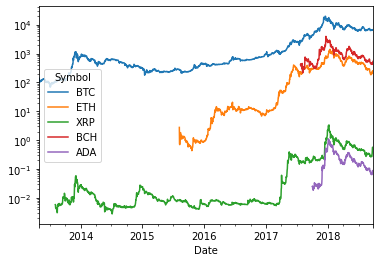

In [49]:
df_5.Close.unstack().T.plot(logy=True)

## Smooth it out

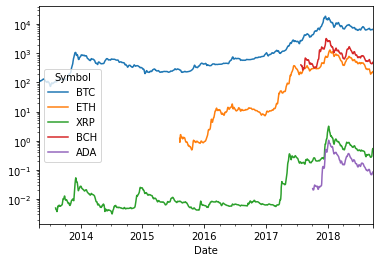

In [51]:
# your code here
def roll(x):
    return x.rolling(window=5, center=True, min_periods=5).mean()
rolled = df_5.groupby(level="Symbol").Close.apply(roll)
rolled.unstack().T.plot(logy=True);

## Create new column for growth

In [62]:
# your code here
df['growth'] = (df_5.groupby('Symbol').Close.diff() > 0)

In [63]:
df.fillna(0)

,,Open,High,Low,Close,Volume,Market Cap,growth
Symbol,Date,,,,,,,
BTC,2013-04-28,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09,False
LTC,2013-04-28,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07,0
NMC,2013-04-28,1.100000,1.120000,1.080000,1.110000,0.0,5.969080e+06,0
NVC,2013-04-28,4.220000,4.250000,4.040000,4.250000,0.0,1.155160e+06,0
PPC,2013-04-28,0.386958,0.404659,0.376287,0.386525,0.0,7.255800e+06,0
...,...,...,...,...,...,...,...,...
ZOI,2018-09-27,0.068958,0.085504,0.062276,0.084638,12330.0,1.270230e+06,0
ZP,2018-09-27,0.408762,0.456677,0.373954,0.432370,217992.0,0.000000e+00,0
ZSE,2018-09-27,0.006862,0.009066,0.006129,0.009013,184.0,0.000000e+00,0


## Determine periods of a stable growth in the top coin

Note we're glossing over potentially missing days, etc. We could resample to fix this, but let's keep it a bit simple. You should be able to reuse some of the rolling code above to do this.

In [6]:
# your code here

If your result agrees with mine, it looks like 2017 was a great year for bitcoin, with lots of stable growth in May.